In [10]:
import numpy as np
import pandas as pd
import seaborn as sns  # for heatmaps
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
COL_DIC = {'0':'lay','1':'pickup','2':'sit','3':'stand','4':'standff','5':'walk','6':'waving'}
PATH = './laboratory/experiment_b/records'
PATH_HW = PATH + '/handwrite'

NET = 'vgg16'
NET2 = 'resnet'
PAIR = ['nuc2','pwr',] 
T = ['L','M','H',]
EPOCHS = 200
METRIC = 'f1_macro'

In [12]:
class Records:
    
    def __init__(self,path=PATH):
        self.path = PATH
        self.cols = COL_DIC
        self.loss = 'None' 
        self.acc  = 'None'
        self.cmtx = 'None'
        self.repo = 'None'
    
    def input_pretrain(self,expname):
        self.loss = pd.read_csv(self.path+'/'+expname+'_loss.csv',index_col=0)
        return 

    def input_initial(self,expname):
        self.cmtx = pd.read_csv(self.path+'/'+expname+'_cmtx.csv',index_col=0)
        self.repo = self.read_repo(expname)
        return 
    
    def input_finetune(self,expname):
        self.loss = pd.read_csv(self.path+'/'+expname+'_loss.csv',index_col=0) 
        self.acc  = pd.read_csv(self.path+'/'+expname+'_accuracy.csv',index_col=0)
        self.cmtx = pd.read_csv(self.path+'/'+expname+'_cmtx.csv',index_col=0)
        self.repo = self.read_repo(expname)
    
    def read_repo(self,expname):
        repo = pd.read_csv(self.path+'/'+expname+'_report.csv',index_col=0)
        repo.rename(columns = self.cols, inplace = True) 
        return repo
    
def input_records(mode,expname):
    rec = Records()
    if mode == 'pretrain':
        rec.input_pretrain(expname)
    elif mode == 'initial':
        rec.input_initial(expname)
    elif mode == 'finetune':
        rec.input_finetune(expname)
    return rec

In [13]:
def multiple_cmtxs(cmtxs,titles,main_title='Confusion Matrix',figsize=(20,8)):
    CMAP = 'Blues'
    FMT = 'g'
    assert len(cmtxs) == len(titles)
    length = len(cmtxs)
    if length > 2:
        f,axs = plt.subplots(round(length/2),2,figsize=figsize)
        for i,(cmtx,title) in enumerate(zip(cmtxs,titles)):
            sns.heatmap(cmtx,ax=axs[i//2][i%2],cmap=CMAP,annot=True, fmt=FMT)
            axs[i//2][i%2].set_title(title)
            f.suptitle(main_title, fontsize=20)
    elif length == 2:
        f,axs = plt.subplots(1,2,figsize=figsize)
        for i,(cmtx,title) in enumerate(zip(cmtxs,titles)):
            sns.heatmap(cmtx,ax=axs[i],cmap=CMAP,annot=True, fmt=FMT)
            axs[i].set_title(title)
            f.suptitle(main_title, fontsize=20)
    elif length == 1:
        plt.figure(figsize=figsize)
        sns.heatmap(cmtxs,cmap=CMAP,annot=True, fmt=FMT)
        plt.title(title)
        
    plt.show()
    return

In [14]:
nor_shallow = input_records('finetune',f'Trainmode-normal-_Network-shallow_Data-exp4csi{PAIR[0]}_Phase_lab-finetune-weight')
nor_alexnet = input_records('finetune',f'Trainmode-normal-_Network-alexnet_Data-exp4csi{PAIR[0]}_Phase_lab-finetune-weight')
nor_deepcnn = input_records('finetune',f'Trainmode-normal-_Network-{NET}_Data-exp4csi{PAIR[0]}_Phase_lab-finetune-weight')
nor_deepcnn2 = input_records('finetune',f'Trainmode-normal-_Network-{NET2}_Data-exp4csi{PAIR[0]}_Phase_lab-finetune-weight')
nor_deepcnn_0  = input_records('initial',f'Trainmode-normal-_Network-{NET}_Data-exp4csi{PAIR[0]}_Phase_lab-initial')
nor_deepcnn_l2 = input_records('finetune',f'Trainmode-normal-r_Network-{NET}_Data-exp4csi{PAIR[0]}_Phase_lab-finetune-weight')
nor_deepcnn_j  = input_records('finetune',f'Trainmode-normal-_Network-{NET}_Data-exp4csinuc2-j_Phase_lab-finetune-weight')

In [15]:
clr_deepcnn = input_records('finetune',f'Trainmode-simclr-{T[0]}_Network-{NET}_Data-exp4csi{PAIR[0]}_Phase_lab-finetune-weight')
clr_deepcnn_0  = input_records('initial',f'Trainmode-simclr-{T[0]}_Network-{NET}_Data-exp4csi{PAIR[0]}_Phase_lab-initial')
clr_deepcnn_t2 = input_records('finetune',f'Trainmode-simclr-{T[1]}_Network-{NET}_Data-exp4csi{PAIR[0]}_Phase_lab-finetune-weight')
clr_deepcnn_t3 = input_records('finetune',f'Trainmode-simclr-{T[2]}_Network-{NET}_Data-exp4csi{PAIR[0]}_Phase_lab-finetune-weight')
clr_deepcnn_pair = input_records('finetune',f'Trainmode-simclr-{T[0]}_Network-{NET}_Data-exp4csi{PAIR[1]}_Phase_lab-finetune-weight')
clr_deepcnn_joint = input_records('finetune',f'Trainmode-simclr-{T[0]}_Network-{NET}_Data-exp4csi{PAIR[0]}-j_Phase_lab-finetune-weight')

In [16]:
clr_shallow  = input_records('finetune',f'Trainmode-simclr-{T[0]}_Network-shallow_Data-exp4csi{PAIR[0]}_Phase_lab-finetune-weight')
clr_alexnet  = input_records('finetune',f'Trainmode-simclr-{T[0]}_Network-alexnet_Data-exp4csi{PAIR[0]}_Phase_lab-finetune-weight')
clr_deepcnn2 = input_records('finetune',f'Trainmode-simclr-{T[0]}_Network-{NET2}_Data-exp4csi{PAIR[0]}_Phase_lab-finetune-weight')

In [17]:
nor_deepcnn_1pc  = input_records('finetune',f'Trainmode-normal-_Network-{NET}_Data-exp4csi{PAIR[0]}_Phase_lab-finetune-1')
nor_deepcnn_5pc  = input_records('finetune',f'Trainmode-normal-_Network-{NET}_Data-exp4csi{PAIR[0]}_Phase_lab-finetune-5')
nor_deepcnn_10pc = input_records('finetune',f'Trainmode-normal-_Network-{NET}_Data-exp4csi{PAIR[0]}_Phase_lab-finetune-10')
nor_deepcnn_uder = input_records('finetune',f'Trainmode-normal-_Network-{NET}_Data-exp4csi{PAIR[0]}_Phase_lab-finetune-undersampling')
nor_deepcnn_over = input_records('finetune',f'Trainmode-normal-_Network-{NET}_Data-exp4csi{PAIR[0]}_Phase_lab-finetune-oversampling')

clr_deepcnn_1pc  = input_records('finetune',f'Trainmode-simclr-L_Network-{NET}_Data-exp4csi{PAIR[0]}_Phase_lab-finetune-1')
clr_deepcnn_5pc  = input_records('finetune',f'Trainmode-simclr-L_Network-{NET}_Data-exp4csi{PAIR[0]}_Phase_lab-finetune-5')
clr_deepcnn_10pc = input_records('finetune',f'Trainmode-simclr-L_Network-{NET}_Data-exp4csi{PAIR[0]}_Phase_lab-finetune-10')
clr_deepcnn_uder = input_records('finetune',f'Trainmode-simclr-L_Network-{NET}_Data-exp4csi{PAIR[0]}_Phase_lab-finetune-undersampling')
clr_deepcnn_over = input_records('finetune',f'Trainmode-simclr-L_Network-{NET}_Data-exp4csi{PAIR[0]}_Phase_lab-finetune-oversampling')

In [22]:
net = 'alexnet'
nor_net_1pc  = input_records('finetune',f'Trainmode-normal-_Network-{net}_Data-exp4csi{PAIR[0]}_Phase_lab-finetune-1')
nor_net_5pc  = input_records('finetune',f'Trainmode-normal-_Network-{net}_Data-exp4csi{PAIR[0]}_Phase_lab-finetune-5')
nor_net_10pc = input_records('finetune',f'Trainmode-normal-_Network-{net}_Data-exp4csi{PAIR[0]}_Phase_lab-finetune-10')
nor_net_uder = input_records('finetune',f'Trainmode-normal-_Network-{net}_Data-exp4csi{PAIR[0]}_Phase_lab-finetune-undersampling')
nor_net_over = input_records('finetune',f'Trainmode-normal-_Network-{net}_Data-exp4csi{PAIR[0]}_Phase_lab-finetune-oversampling')

clr_net_1pc  = input_records('finetune',f'Trainmode-simclr-L_Network-{net}_Data-exp4csi{PAIR[0]}_Phase_lab-finetune-1')
clr_net_5pc  = input_records('finetune',f'Trainmode-simclr-L_Network-{net}_Data-exp4csi{PAIR[0]}_Phase_lab-finetune-5')
clr_net_10pc = input_records('finetune',f'Trainmode-simclr-L_Network-{net}_Data-exp4csi{PAIR[0]}_Phase_lab-finetune-10')
clr_net_uder = input_records('finetune',f'Trainmode-simclr-L_Network-{net}_Data-exp4csi{PAIR[0]}_Phase_lab-finetune-undersampling')
clr_net_over = input_records('finetune',f'Trainmode-simclr-L_Network-{net}_Data-exp4csi{PAIR[0]}_Phase_lab-finetune-oversampling')

In [18]:
clr_deepcnn_p7f5   = input_records('finetune',f'Trainmode-simclr-L_Network-{NET}_Data-exp4csi{PAIR[0]}-j-Extra-p7f5_Phase_lab-finetune-weight')
clr_deepcnn_p7f6a  = input_records('finetune',f'Trainmode-simclr-L_Network-{NET}_Data-exp4csi{PAIR[0]}-j-Extra-p7f6a_Phase_lab-finetune-weight')
clr_deepcnn_p7f6b  = input_records('finetune',f'Trainmode-simclr-L_Network-{NET}_Data-exp4csi{PAIR[0]}-j-Extra-p7f6b_Phase_lab-finetune-weight')

# Result

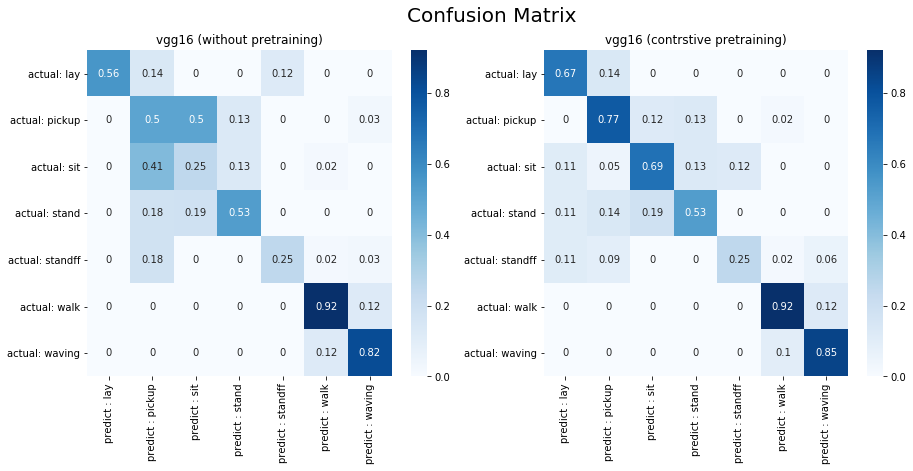

In [29]:
# confusion matrix 
k1 = nor_deepcnn.cmtx.copy()
k2 = clr_deepcnn.cmtx.copy()
k1 = (k1/k1.sum(1).tolist()).round(2)
k2 = (k2/k2.sum(1).tolist()).round(2)
mdl = NET


multiple_cmtxs([k1,k2],
               titles=[f'{mdl} (without pretraining)',f'{mdl} (contrstive pretraining)'],
               # main_title='Comparison between normal and SimCLR',
               figsize=(15,6))

Text(0.5, 1.0, 'Loss in 200 epochs (every 10 epochs from 10th epoch)')

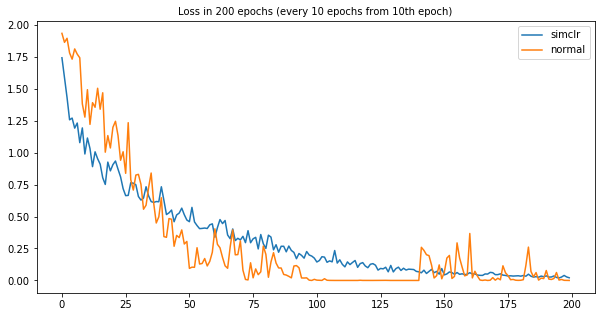

In [295]:
# Loss
items = [clr_deepcnn,nor_deepcnn]
X = ['simclr','normal']
plt.figure(figsize=(10,5))
for i in items:
    plt.plot(i.loss['loss']) 
plt.legend(X)
plt.title(f'Loss in {EPOCHS} epochs (every 10 epochs from 10th epoch)',fontsize=10)

Text(0.5, 1.0, 'f1_macro in 200 epochs (every 10 epochs from 10th epoch)')

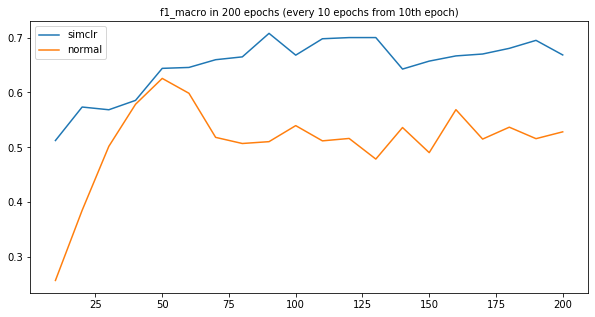

In [312]:
metric = METRIC
items = [clr_deepcnn,nor_deepcnn]
X = ['simclr','normal']
plt.figure(figsize=(10,5))
for i in items:
    plt.plot(np.arange(10,EPOCHS+10,10),i.acc[metric]) 
plt.legend(X)
plt.title(f'{metric} in {EPOCHS} epochs (every 10 epochs from 10th epoch)',fontsize=10)

In [316]:
# Initialization

metric = 'macro avg'
print('------------Initial------------')
print('simclr: ',clr_deepcnn_0.repo.loc['f1-score',metric])
print('normal: ',nor_deepcnn_0.repo.loc['f1-score',metric])

------------Initial------------
simclr:  0.06993006993006992
normal:  0.03571428571428571


Text(0.5, 1.0, 'Comparision of different training method on the performance (f1_macro)')

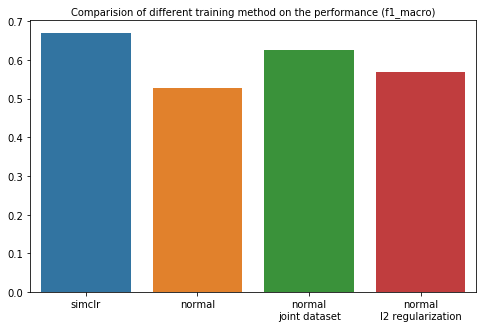

In [309]:
# Evaluation metrics 

metric = METRIC
items = [clr_deepcnn,nor_deepcnn,nor_deepcnn_j,nor_deepcnn_l2]
X = ['simclr','normal','normal\njoint dataset','normal\nl2 regularization']
plt.figure(figsize=(8,5))
sns.barplot(y=[i.acc.iloc[-1][metric] for i in items],x=X) 
plt.title(f'Comparision of different training method on the performance ({metric})',fontsize=10)

Text(0.5, 1.0, 'Performance of the models with and without contrastive pretraining (simclr) (f1_macro)')

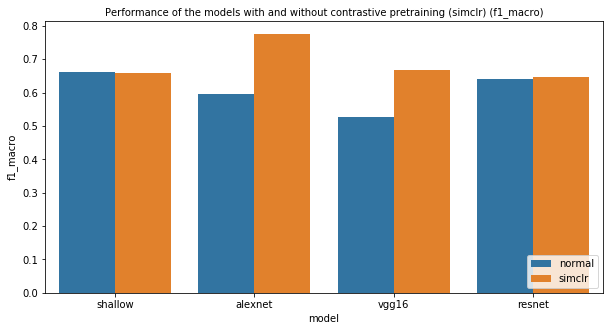

In [307]:
# Factor analysis of contrastive pretraining (model)

metric = METRIC
i = 0
df = {'mode':[],'model':[],metric:[]} 
items = [nor_shallow,nor_alexnet,nor_deepcnn,nor_deepcnn2,clr_shallow,clr_alexnet,clr_deepcnn,clr_deepcnn2]

for tm in ['normal','simclr']:
    for mdl in ['shallow','alexnet',NET,NET2]:
        df['mode'].append(tm)
        df['model'].append(mdl)
        df[metric].append(items[i].acc.iloc[-1][metric])
        i += 1

df = pd.DataFrame(df,index=range(0,i))
plt.figure(figsize=(10,5))
sns.barplot(data=df,y=metric,x='model',hue='mode')
plt.legend(loc='lower right')
plt.title(f'Performance of the models with and without contrastive pretraining (simclr) ({metric})',fontsize=10)

Text(0.5, 0.98, 'Effect of factors on Contrastive pretraining (f1_macro)')

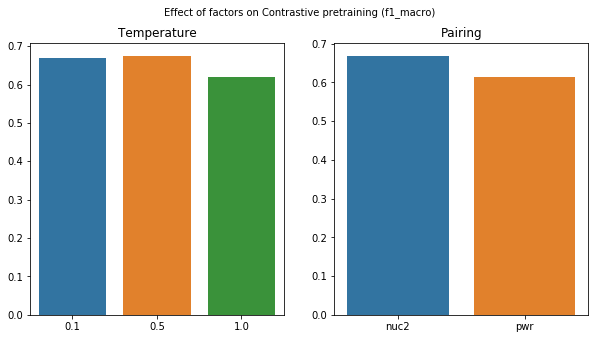

In [302]:
# Factor analysis of contrastive pretraining (temperature, pairing)

metric = METRIC
items = [clr_deepcnn,clr_deepcnn_t2,clr_deepcnn_t3]
X = [0.1,0.5,1]
f,axs = plt.subplots(1,2,figsize=(10,5))
sns.barplot(y=[i.acc.iloc[-1][metric] for i in items],x=X, ax=axs[0])
axs[0].set_title('Temperature')

items = [clr_deepcnn,clr_deepcnn_pair] # ,clr_deepcnn_joint
X = PAIR # + ['joint']
sns.barplot(y=[i.acc.iloc[-1][metric] for i in items],x=X, ax=axs[1])
axs[1].set_title('Pairing')
f.suptitle(f'Effect of factors on Contrastive pretraining ({metric})',fontsize=10)

Text(0.5, 1.0, 'Performance of the models under different sampling condition (f1_macro)')

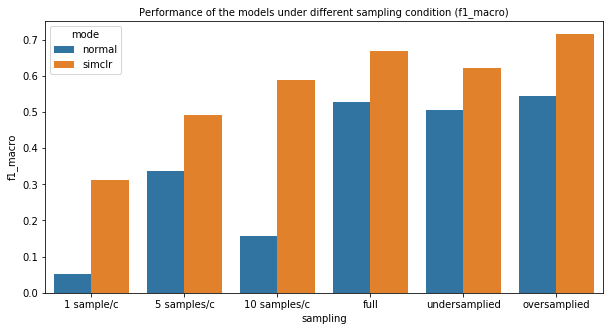

In [315]:
# Factor analysis of contrastive pretraining (number of sample)

metric = METRIC
i = 0
df = {'mode':[],'sampling':[],metric:[]} 
items = [nor_deepcnn_1pc,nor_deepcnn_5pc,nor_deepcnn_10pc,nor_deepcnn,nor_deepcnn_uder,nor_deepcnn_over,
         clr_deepcnn_1pc,clr_deepcnn_5pc,clr_deepcnn_10pc,clr_deepcnn,clr_deepcnn_uder,clr_deepcnn_over,]

for tm in ['normal','simclr']:
    for smp in ['1 sample/c','5 samples/c','10 samples/c','full','undersamplied','oversamplied']:
        df['mode'].append(tm)
        df['sampling'].append(smp)
        df[metric].append(items[i].acc.iloc[-1][metric])
        i += 1

df = pd.DataFrame(df,index=range(0,i))
plt.figure(figsize=(10,5))
sns.barplot(data=df,y=metric,x='sampling',hue='mode')
plt.title(f'Performance of the models under different sampling condition ({metric})',fontsize=10)

Text(0.5, 1.0, 'f1 score under different activity set')

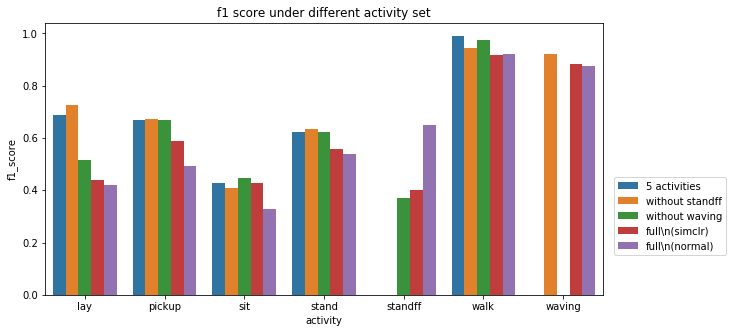

In [304]:
# How the available class under finetuning affect the result
df = pd.read_csv(PATH_HW+'/'+'f1_score_activity_set.csv',index_col=0)
plt.figure(figsize=(10,5))
sns.barplot(data=df,x='activity',y='f1_score',hue='activity_set')
plt.legend(bbox_to_anchor=(1.01,0.45), loc="upper left")
plt.title('f1 score under different activity set')

# AlexNet

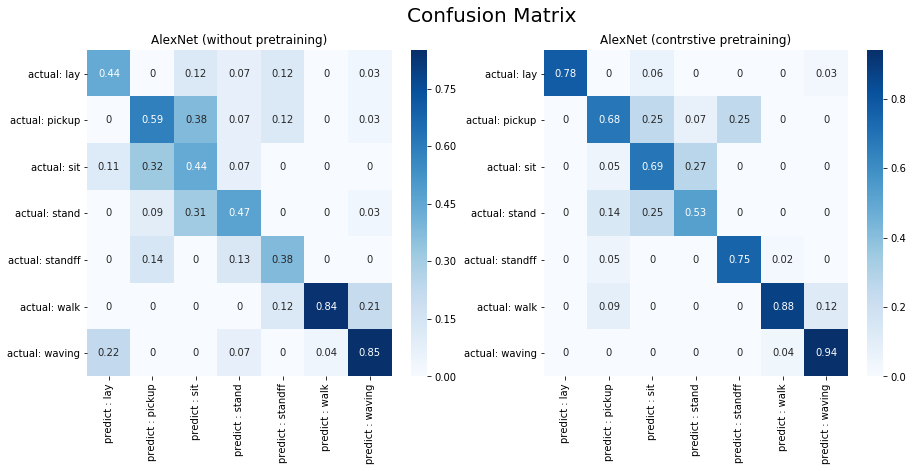

In [24]:
# confusion matrix 
k1 = nor_alexnet.cmtx.copy()
k2 = clr_alexnet.cmtx.copy()
k1 = (k1/k1.sum(1).tolist()).round(2)
k2 = (k2/k2.sum(1).tolist()).round(2)
mdl = 'AlexNet'


multiple_cmtxs([k1,k2],
               titles=[f'{mdl} (without pretraining)',f'{mdl} (contrstive pretraining)'],
               # main_title='Comparison between normal and SimCLR',
               figsize=(15,6))

Text(0.5, 1.0, 'accuracy in 200 epochs (every 10 epochs from 10th epoch)')

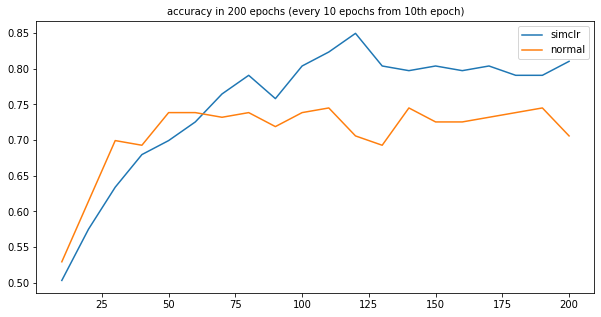

In [28]:
metric = 'accuracy'
items = [clr_alexnet,nor_alexnet]
X = ['simclr','normal']
plt.figure(figsize=(10,5))
for i in items:
    plt.plot(np.arange(10,EPOCHS+10,10),i.acc[metric]) 
plt.legend(X)
plt.title(f'{metric} in {EPOCHS} epochs (every 10 epochs from 10th epoch)',fontsize=10)

Text(0.5, 1.0, 'Performance of the AlexNet under different sampling condition (f1_macro)')

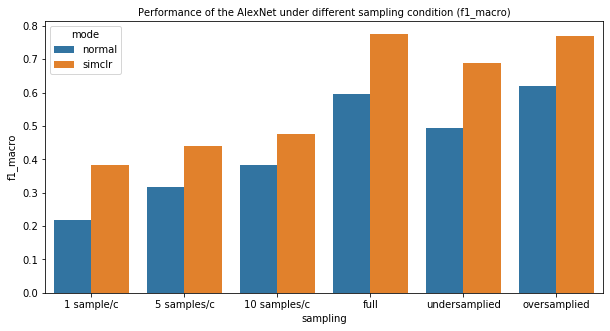

In [23]:
# Factor analysis of contrastive pretraining (number of sample)

metric = METRIC
i = 0
df = {'mode':[],'sampling':[],metric:[]} 
items = [nor_net_1pc,nor_net_5pc,nor_net_10pc,nor_alexnet,nor_net_uder,nor_net_over,
         clr_net_1pc,clr_net_5pc,clr_net_10pc,clr_alexnet,clr_net_uder,clr_net_over,]

for tm in ['normal','simclr']:
    for smp in ['1 sample/c','5 samples/c','10 samples/c','full','undersamplied','oversamplied']:
        df['mode'].append(tm)
        df['sampling'].append(smp)
        df[metric].append(items[i].acc.iloc[-1][metric])
        i += 1

df = pd.DataFrame(df,index=range(0,i))
plt.figure(figsize=(10,5))
sns.barplot(data=df,y=metric,x='sampling',hue='mode')
plt.title(f'Performance of the AlexNet under different sampling condition ({metric})',fontsize=10)